In [1]:
%run ../../Initialisation_Notebook/Initialize.ipynb

Initialization done, Notebook was last run on: 15/07/2020 at 15:44:22


In [2]:
import uproot

In [3]:
def root_to_pandas(root_path, saving_path):
    file = uproot.open(root_path)
    tree=file["hit"]
    tree_dict={'edep':tree.array('edep'),
               'preedep':tree.array('preedep'),
               'postedep':tree.array('postedep'),
               'zDep':tree.array('zDep'),
               'xDep':tree.array('xDep'),
               'yDep':tree.array('yDep'),
               'typeDepInt':tree.array('typeDepInt'), # 1 = e- 2 =gamma
               'processDepInt':tree.array('processDepInt'),
               # initStep 0 eIoni 1 eBrem 2 
               #StepLimiter 5 compt 3 phot 4
               'trackID':tree.array('trackID'),
               'parentID':tree.array('parentID'),
                'eventID':tree.array('eID')}
    test = pd.DataFrame(tree_dict)
    test.to_hdf(saving_path, key='df')
    
    print('Check if simulation is ok ? ')
    print('nb of events simulated : 100000')
    print('...... nb of events measured', len(test.eventID.unique()))
    print('Energy simulated : ')
    print('...... mean of energy measured', np.mean(sum(test.edep.values))/len(test.eventID.unique()), 'MeV')
    return test

# 0vbb

In [4]:
vbb = root_to_pandas('N02-2_Electrons_Final/0vbb_simulation_uniform_all_tpc.root','0vbb_simulation_uniform_all_tpc.h5')

Check if simulation is ok ? 
nb of events simulated : 100000
...... nb of events measured 20000
Energy simulated : 
...... mean of energy measured 2.4575013394358463 MeV


### Show brem spectrum

In [6]:
edep_brem=[]

test=vbb.copy()

#test_track_id=[]
for e in test.eventID.unique(): 
    if e == 1000 :print(e)
    elif e == 5000 :print(e)
    elif e == 10000 :print(e)
        
    ici=test[(test.eventID==e)&(test.processDepInt==2)]
    if len(ici)!=0:
        #print('no brem')
        edep_brem.append(sum(ici.preedep.values-ici.postedep.values)*1000)

In [15]:
np.savetxt('0vbb_simulation_brem_spectrum.csv',edep_brem , delimiter=',')

In [16]:
nbofbrem=0
for i in range(len(edep_brem)):
    if edep_brem[i]!=0: 
        #print(edep_brem[i])
        nbofbrem+=1

In [17]:
print('Number of brem :', round(nbofbrem/len(test.eventID.unique())*100,2),'%')
print('Fraction of kinetic energy transport per brem :', round(np.mean(edep_brem)/(1223*2)*100,2), '%')

Number of brem : 91.12 %
Fraction of kinetic energy transport per brem : 5.48 %


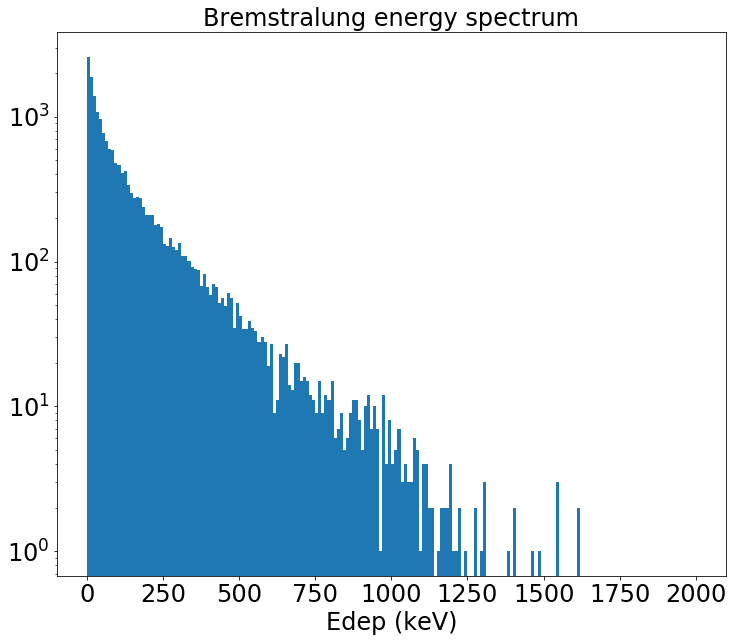

In [18]:
plt.title('Bremstralung energy spectrum')
plt.hist(np.multiply(edep_brem,1), bins=200, range=[0,2000])

plt.yscale('log')
plt.xlabel('Edep (keV)')

plt.show()

In [19]:
max(edep_brem)/1000

1.6177814681704268